<a href="https://colab.research.google.com/github/endisoares31/Analise-Espacial-Dados-Geograficos/blob/main/Dados_de_Pobreza_por_concelho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
!pip install mapclassify -q
!pip install geopandas -q
!pip install contextily -q

In [ ]:
 from google.colab import drive

drive.mount("/content/gdrive")


In [147]:
# Importar as bibiotecas 

import folium
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import contextily as ctx


In [148]:
#Leitura dos dados csv
data = pd.read_csv('/content/drive/MyDrive/data_gis/dados_pobreza.csv')
data.head()


,id,ilha,concelho,incidencia,profundidade,severidade,pobreza_absoluta_extrema
0,1,Santo Antão,Ribeira Grande,37.3,10.7,4.4,8.0
1,2,Santo Antão,Porto Novo,52.2,20.1,10.1,21.4
2,3,São Vicente,São Vicente,26.8,8.2,3.4,6.2
3,4,São Nicolau,Ribeira Brava,35.3,12.0,5.2,12.3
4,6,Sal,Sal,19.1,5.0,1.7,2.2


In [149]:
#Obtendo os dados dos limites dos concelhos

fp =('/content/drive/MyDrive/data_gis/limites concelho.shp')
geodata = gpd.read_file(fp)

In [150]:
geodata.head()

,id,ilha,concelho,geometry
0,1,Santo Antão,Ribeira Grande,"POLYGON ((45541.320 280589.670, 45557.470 2805..."
1,2,Santo Antão,Porto Novo,"MULTIPOLYGON (((49793.861 269471.869, 49793.82..."
2,3,São Vicente,São Vicente,"MULTIPOLYGON (((53781.671 247745.087, 53767.14..."
3,4,São Nicolau,Ribeira Brava,"POLYGON ((124947.290 222402.650, 124948.991 22..."
4,6,Sal,Sal,"MULTIPOLYGON (((281135.992 224162.530, 281142...."


In [151]:
#print informacoes 
print("Contagem original de atributos:", len(data))
print("contagem origibal de geometrias:", len(geodata))

Contagem original de atributos: 22
contagem origibal de geometrias: 22


In [152]:
geodata = geodata.merge(data, on = "concelho")

print("Contagem depois do join:", len(geodata))
geodata.head()

Contagem depois do join: 22


,id_x,ilha_x,concelho,geometry,id_y,ilha_y,incidencia,profundidade,severidade,pobreza_absoluta_extrema
0,1,Santo Antão,Ribeira Grande,"POLYGON ((45541.320 280589.670, 45557.470 2805...",1,Santo Antão,37.3,10.7,4.4,8.0
1,2,Santo Antão,Porto Novo,"MULTIPOLYGON (((49793.861 269471.869, 49793.82...",2,Santo Antão,52.2,20.1,10.1,21.4
2,3,São Vicente,São Vicente,"MULTIPOLYGON (((53781.671 247745.087, 53767.14...",3,São Vicente,26.8,8.2,3.4,6.2
3,4,São Nicolau,Ribeira Brava,"POLYGON ((124947.290 222402.650, 124948.991 22...",4,São Nicolau,35.3,12.0,5.2,12.3
4,6,Sal,Sal,"MULTIPOLYGON (((281135.992 224162.530, 281142....",6,Sal,19.1,5.0,1.7,2.2


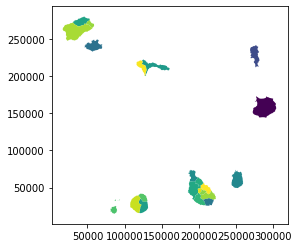

In [153]:
#Criar um mapa estatico

geodata.plot(column="incidencia")


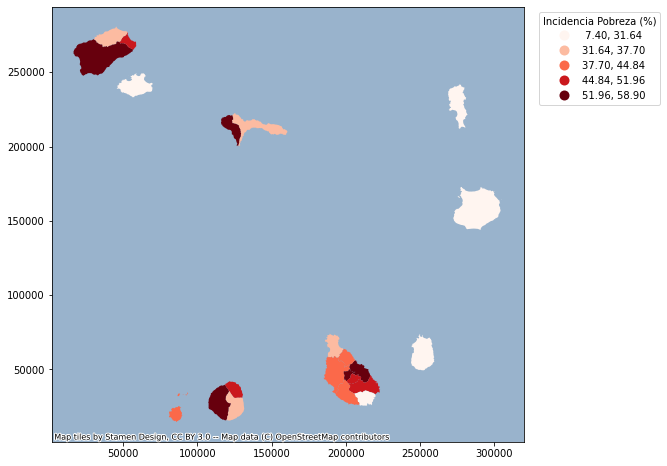

In [158]:
#Ajustando o Mapa

fig, ax = plt.subplots(1, figsize=(10, 8))

geodata.plot(ax=ax, column="incidencia", scheme="quantiles", cmap="Reds", legend=True)

ax.get_legend().set_bbox_to_anchor((1.3,1))
ax.get_legend().set_title("Incidencia Pobreza (%)")
ctx.add_basemap(ax)




